# Preprocessing

Notebook ini merupakan bagian dari buku **Machine Learning menggunakan Python** oleh **Fahmi Noor Fiqri**. Notebook ini berisi contoh kode untuk **BAB IV - Preprocessing.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error

set_config(display="diagram")

## Membaca Data

In [2]:
df = pd.read_csv(r'../datasets/adult.csv', na_values=["?"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   martial-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Menghapus Data Duplikat

In [3]:
df_non_duplicated = df.drop_duplicates()

print("Jumlah dataset asli: ", len(df.duplicated()))
print("Jumlah data tanpa duplikat: ", len(df_non_duplicated))
df.loc[df.duplicated()].head()

Jumlah dataset asli:  32561
Jumlah data tanpa duplikat:  32537


,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


## Bekerja dengan *Missing Values*

### Menghapus Kolom

In [4]:
df_dropped = df.drop("workclass", axis=1) 
df_dropped.columns 

Index(['age', 'fnlwgt', 'education', 'education-num', 'martial-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

### Menghapus Data Kosong

In [5]:
# Menghapus data kosong berdasarkan baris (axis=0)
df_no_na = df.dropna(axis=0)

print("Jumlah data sebelum dropna:", len(df))
print("Jumlah data setelah dropna:", len(df_no_na))
print("Jumlah data kosong berdasarkan atribut:")
print("Semua kolom: ", df_no_na.columns.values)

Jumlah data sebelum dropna: 32561
Jumlah data setelah dropna: 30162
Jumlah data kosong berdasarkan atribut:
Semua kolom:  ['age' 'workclass' 'fnlwgt' 'education' 'education-num' 'martial-status'
 'occupation' 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country' 'income']


In [6]:
# Menghapus data kosong berdasarkan kolom (axis=1)
df_no_na = df.dropna(axis=1)

print("Jumlah data sebelum dropna:", len(df))
print("Jumlah data setelah dropna:", len(df_no_na))
print("Jumlah data kosong berdasarkan atribut:")
print("Semua kolom: ", df_no_na.columns.values)

Jumlah data sebelum dropna: 32561
Jumlah data setelah dropna: 32561
Jumlah data kosong berdasarkan atribut:
Semua kolom:  ['age' 'fnlwgt' 'education' 'education-num' 'martial-status'
 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
 'hours-per-week' 'income']


### Mengisi Data Kosong

In [7]:
# Mensimulasikan data yang kosong
missing_rate = 0.20  # 20% data kosong
original_data = df["age"].dropna().values.astype(float).reshape(-1, 1)

rng = np.random.default_rng(seed=42)
random_mask = rng.choice([True, False], original_data.shape, p=[missing_rate, 1-missing_rate])
missing_data = original_data.copy()
missing_data[random_mask] = np.nan


<AxesSubplot:>

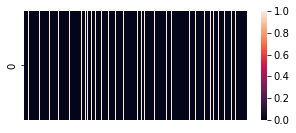

In [8]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.heatmap(np.isnan(missing_data).T, xticklabels=False, ax=ax)

In [9]:
# Simple impute
simple_imputer = SimpleImputer(strategy="median")
data_impute_simple = simple_imputer.fit_transform(missing_data)

In [10]:
# K-Nearest Neighbor impute
knn_imputer = KNNImputer(n_neighbors=10)
data_impute_knn = knn_imputer.fit_transform(missing_data)

,Metode,MAE,MSE
0,Simple,2.233377,38.355794
1,KNN,2.243569,37.719419


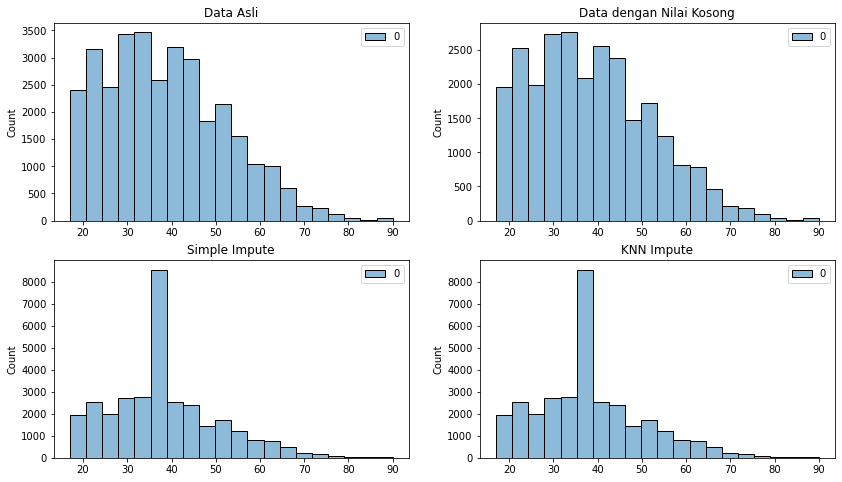

In [11]:
plt.figure(figsize=(14, 8))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title("Data Asli")
sns.histplot(original_data, bins=20, ax=ax1)

ax2 = plt.subplot(2, 2, 2)
ax2.set_title("Data dengan Nilai Kosong")
sns.histplot(missing_data, bins=20, ax=ax2)

ax3 = plt.subplot(2, 2, 3)
ax3.set_title("Simple Impute")
sns.histplot(data_impute_simple, bins=20, ax=ax3)

ax4 = plt.subplot(2, 2, 4)
ax4.set_title("KNN Impute")
sns.histplot(data_impute_knn, bins=20, ax=ax4)

pd.DataFrame({
    "Metode": ["Simple", "KNN"],
    "MAE": [mean_absolute_error(original_data, data_impute_simple), mean_absolute_error(original_data, data_impute_knn)],
    "MSE": [mean_squared_error(original_data, data_impute_simple), mean_squared_error(original_data, data_impute_knn)],
})

## Over-sampling/Under-sampling Data

In [12]:
df["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [13]:
# Upsampling
df_majority = df[df["income"] == "<=50K"]
df_minority = df[df["income"] == ">50K"]

df_resampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_upsampled = pd.concat([df_majority, df_resampled])

df_upsampled["income"].value_counts()

<=50K    24720
>50K     24720
Name: income, dtype: int64

In [14]:
# Downsampling
df_majority = df[df["income"] == "<=50K"]
df_minority = df[df["income"] == ">50K"]

df_resampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
df_downsampled = pd.concat([df_resampled, df_minority])

df_downsampled["income"].value_counts()

<=50K    7841
>50K     7841
Name: income, dtype: int64

## Normalisasi Data

In [15]:
data_to_scale = df["age"].values.reshape(-1, 1)

standard_scaler = StandardScaler()
standard_scaler_output = standard_scaler.fit_transform(data_to_scale)

minmax_scaler = MinMaxScaler()
minmax_scaler_output = minmax_scaler.fit_transform(data_to_scale)

print("Sebelum distandarisasi:")
print(data_to_scale[0:5].ravel())
print("Setelah distandarisasi (standard scaler):")
print(standard_scaler_output[0:5].ravel())
print("Setelah distandarisasi (minmax scaler):")
print(minmax_scaler_output[0:5].ravel())

Sebelum distandarisasi:
[39 50 38 53 28]
Setelah distandarisasi (standard scaler):
[ 0.03067056  0.83710898 -0.04264203  1.05704673 -0.77576787]
Setelah distandarisasi (minmax scaler):
[0.30136986 0.45205479 0.28767123 0.49315068 0.15068493]


## Feature Construction pada DataFrame

In [16]:
df_features = df.copy()
df_features["pay-per-hours"] = df_features["capital-gain"] / df_features["hours-per-week"]
df_features["is-married"] = df_features["martial-status"].str.contains("[Mm]arried") & ~df_features["martial-status"].str.contains("[Nn]ever-[Mm]arried")
df_features.head()

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,pay-per-hours,is-married
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,54.35,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.00,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.00,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0.00,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0.00,True


## Pengkodean Data Kategorik

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Label Encoding

In [18]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("Sampel hasil pengkodean: ", y_encoded[0:5])
dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

Sampel hasil pengkodean:  [0 0 0 0 0]


{'<=50K': 0, '>50K': 1}

### Ordinal Encoding

In [19]:
encoder = OrdinalEncoder()

y_reshape = y.reshape(-1, 1)
y_encoded = encoder.fit_transform(y_reshape)
ordinal_categories = encoder.categories_[0]

print("Sampel hasil pengkodean: ", y_encoded[0:5].ravel())
dict(zip(ordinal_categories, range(0, len(ordinal_categories))))

Sampel hasil pengkodean:  [0. 0. 0. 0. 0.]


{'<=50K': 0, '>50K': 1}

### One-Hot Encoding

In [20]:
encoder = OneHotEncoder()

y_reshape = y.reshape(-1, 1)
y_encoded = encoder.fit_transform(y_reshape)

print("Sampel hasil pengkodean: ", y_encoded[0:5].toarray().tolist())
print([x for x in enumerate(encoder.get_feature_names_out())])

Sampel hasil pengkodean:  [[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]
[(0, 'x0_<=50K'), (1, 'x0_>50K')]


## Column Transformation Pipeline

In [21]:
numerical_cols = [0, 2, 10, 11, 12]
categorical_ordinal_cols = [3]
categorical_nominal_cols = [1, 5, 6, 7, 8, 9, 13]

impute_categorical_enc  = SimpleImputer(strategy="most_frequent")
onehot_categorical_enc  = OneHotEncoder(handle_unknown="ignore")
ordinal_categorical_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
numerical_scaler_enc    = MinMaxScaler()

ct = ColumnTransformer([
    ("encode-categorical-nominal", Pipeline(steps=[
        ("impute-missing", impute_categorical_enc),
        ("encode-nominal", onehot_categorical_enc)
    ]), categorical_nominal_cols),
    ("encode-categorical-ordinal", ordinal_categorical_enc, categorical_ordinal_cols),
    ("scale-numerical", MinMaxScaler(), numerical_cols)
])

ct.fit(X)

ColumnTransformer(transformers=[('encode-categorical-nominal',
                                 Pipeline(steps=[('impute-missing',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode-nominal',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [1, 5, 6, 7, 8, 9, 13]),
                                ('encode-categorical-ordinal',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 [3]),
                                ('scale-numerical', MinMaxScaler(),
                                 [0, 2, 10, 11, 12])])

In [22]:
print("Input:\n", X[0:1])
print("Output:\n", ct.transform(X[0:1]).toarray())

Input:
 [[39 'State-gov' 77516 'Bachelors' 13 'Never-married' 'Adm-clerical'
  'Not-in-family' 'White' 'Male' 2174 0 40 'United-States']]
Output:
 [[0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.
  1.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         9.
  0.30136986 

## Feature Selection

In [23]:
xx = X[:100, numerical_cols]
yy = y[:100]

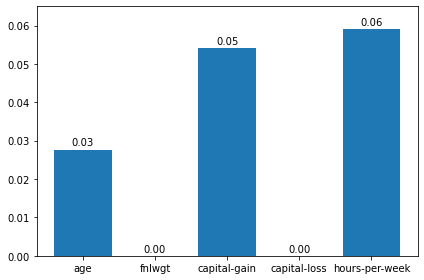

In [24]:
infogain_result = mutual_info_classif(xx, yy, random_state=42)
bars = plt.bar(df.columns[numerical_cols], infogain_result)

plt.ylim(0, max(infogain_result) * 1.1)
plt.bar_label(bars, fmt="%.2f", padding=2)
plt.tight_layout()

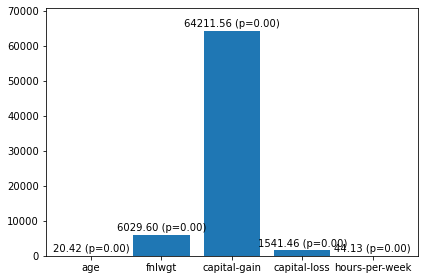

In [25]:
chi2_result = chi2(xx, yy)

bars = plt.bar(df.columns[numerical_cols], chi2_result[0])
labels = ["{0:.2f} (p={1:.2f})".format(x, y) for x, y in zip(chi2_result[0], chi2_result[1])]

plt.ylim(0, max(chi2_result[0]) * 1.1)
plt.bar_label(bars, labels=labels, padding=2)
plt.tight_layout()

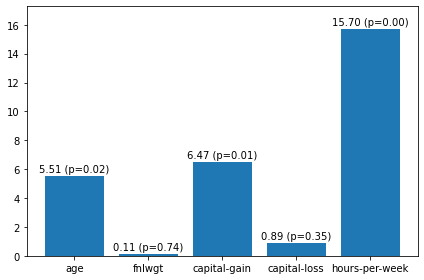

In [26]:
anova_result = f_classif(xx, yy)

bars = plt.bar(df.columns[numerical_cols], anova_result[0])
labels = ["{0:.2f} (p={1:.2f})".format(x, y) for x, y in zip(anova_result[0], anova_result[1])]

plt.ylim(0, max(anova_result[0]) * 1.1)
plt.bar_label(bars, labels=labels, padding=2)
plt.tight_layout()

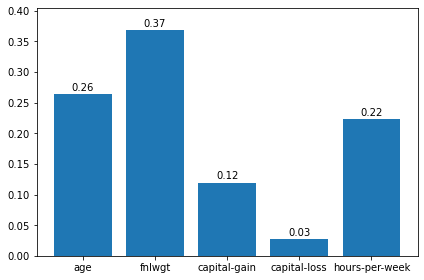

In [27]:
tree_model = DecisionTreeClassifier()
tree_model.fit(xx, yy)

bars = plt.bar(df.columns[numerical_cols], tree_model.feature_importances_)

plt.ylim(0, max(tree_model.feature_importances_) * 1.1)
plt.bar_label(bars, fmt="%.2f", padding=2)
plt.tight_layout()

## Reduksi Dimensi

In [28]:
def plot_explained_variance(variances):
    cum_sum_eig = np.cumsum(np.round(variances, decimals=3))

    fig, ax = plt.subplots()

    hbars = ax.bar(range(0, len(variances)), variances, alpha=0.5, align='center', label='Individual explained variance')
    ax.step(range(0, len(cum_sum_eig)), cum_sum_eig, where='mid', label='Cumulative explained variance')

    ax.bar_label(hbars, fmt='%.4f')
    ax.set_ylabel('Explained variance ratio')
    ax.set_xlabel('Principal component index')
    ax.set_xticks(range(0, len(variances)))

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.01), fancybox=True, shadow=True, ncol=5)
    fig.tight_layout()

In [29]:
train_data_pca = X[:, numerical_cols]

pca = PCA(n_components=2, random_state=42)
pca.fit(train_data_pca)

PCA(n_components=2, random_state=42)

Data sebelum reduksi dimensi
[[39 77516 2174 0 40]]
Data setelah reduksi dimensi
[[-112262.3296609     1099.91709787]]


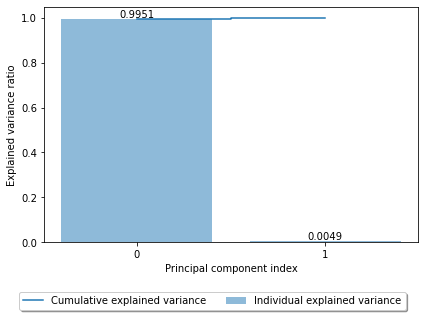

In [30]:
print("Data sebelum reduksi dimensi")
print(train_data_pca[0:1])
print("Data setelah reduksi dimensi")
print(pca.transform(train_data_pca[0:1]))

plot_explained_variance(pca.explained_variance_ratio_)

In [31]:
ct_reduce_dims = Pipeline(steps=[
    ("transform-columns", ct),
    ("dimension-reduction", TruncatedSVD(n_components=8, random_state=42))
])

ct_reduce_dims.fit(X)

Pipeline(steps=[('transform-columns',
                 ColumnTransformer(transformers=[('encode-categorical-nominal',
                                                  Pipeline(steps=[('impute-missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode-nominal',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [1, 5, 6, 7, 8, 9, 13]),
                                                 ('encode-categorical-ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [3]),
                                                 ('scale-numerical',
                                                  MinMaxScaler(),
                                                  [0, 2, 10, 11, 12])])),
                ('dimension-reduction',
                 TruncatedSVD(n_components=8, random_state=42))])

Data sebelum praproses dan reduksi dimensi
[[39 'State-gov' 77516 'Bachelors' 13 'Never-married' 'Adm-clerical'
  'Not-in-family' 'White' 'Male' 2174 0 40 'United-States']]
Data setelah praproses dan reduksi dimensi
[[ 9.17166842 -0.3428997   0.47239131 -0.75159315  0.84468271  0.48701428
  -0.19597023 -0.02607514]]


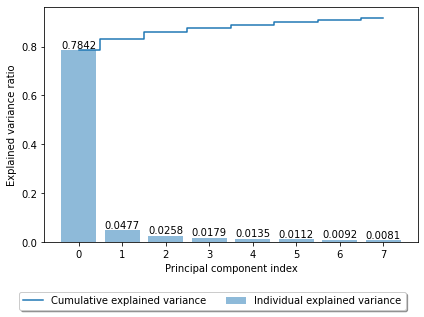

In [32]:
print("Data sebelum praproses dan reduksi dimensi")
print(X[0:1])
print("Data setelah praproses dan reduksi dimensi")
print(ct_reduce_dims.transform(X[0:1]))

ct_svd = ct_reduce_dims["dimension-reduction"]
plot_explained_variance(ct_svd.explained_variance_ratio_)